In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
wine = pd.read_csv('wine.csv', names=['acid1', 'acid2', 'acid3', 'sugar', 'na', 'a1','a2','dense',
                                        'ph','cal','al','tasty','class'])
# 피쳐 정보가 지정 되어있지 않아 지정.
# 피쳐 정보가 주어져 있지 않다면 첫 행이 피쳐 정보로 들어가게 됨. (첫 행의 데이터 손실 발생)
# 등급(0~10), 종류(0 - 화이트와인, 1 - 레드와인)

In [64]:
wine

,acid1,acid2,acid3,sugar,na,a1,a2,dense,ph,cal,al,tasty,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [65]:
wine.describe()

,acid1,acid2,acid3,sugar,na,a1,a2,dense,ph,cal,al,tasty,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [66]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acid1   6497 non-null   float64
 1   acid2   6497 non-null   float64
 2   acid3   6497 non-null   float64
 3   sugar   6497 non-null   float64
 4   na      6497 non-null   float64
 5   a1      6497 non-null   float64
 6   a2      6497 non-null   float64
 7   dense   6497 non-null   float64
 8   ph      6497 non-null   float64
 9   cal     6497 non-null   float64
 10  al      6497 non-null   float64
 11  tasty   6497 non-null   int64  
 12  class   6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [69]:
wine['class'].value_counts()

0    4898
1    1599
Name: class, dtype: int64

In [70]:
wine['tasty'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: tasty, dtype: int64

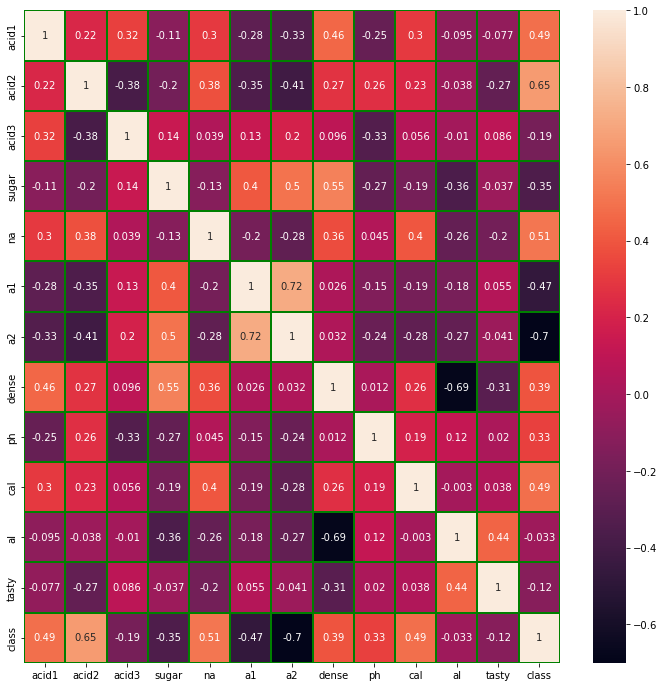

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(wine.corr(), annot=True, linewidth=2, linecolor='green') # wine 데이터의 피쳐들 간 상관관계 확인
plt.show()
# acid1(주석산 농도)과 class(와인의 종류)의 상관관계가 매우 높음을 알 수 있음.

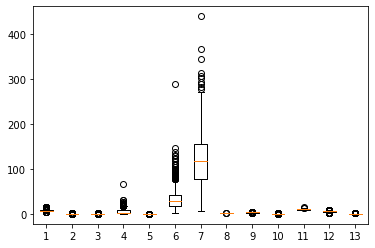

In [74]:
fig, ax = plt.subplots()
ax = plt.boxplot(wine) 
# whisker를 벗어난 몇몇 이상치가 존재
# 평균값과 중앙값이 이러한 이상치 때문에 차이가 남

In [78]:
# 결측값 강제 생성 (피쳐 당 100개 정도)
wine[2000:2100] = np.nan
wine.isnull().sum(0)

acid1    100
acid2    100
acid3    100
sugar    100
na       100
a1       100
a2       100
dense    100
ph       100
cal      100
al       100
tasty    100
class    100
dtype: int64

In [84]:
"""
결측값 전처리
1. 특정값 대체(0)
2. 피쳐 별 평균으로 대체
"""
wine_a = wine.fillna(wine.mean())
wine_a[2000:2100]

,acid1,acid2,acid3,sugar,na,a1,a2,dense,ph,cal,al,tasty,class
2000,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2001,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2002,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2003,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2004,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2096,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2097,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961
2098,7.222253,0.340471,0.318518,5.427403,0.056191,30.412537,115.23894,0.994702,3.218421,0.53153,10.496487,5.819134,0.249961


In [87]:
wine_a.isnull().sum(0)

acid1    0
acid2    0
acid3    0
sugar    0
na       0
a1       0
a2       0
dense    0
ph       0
cal      0
al       0
tasty    0
class    0
dtype: int64